Accuracy: 0.72


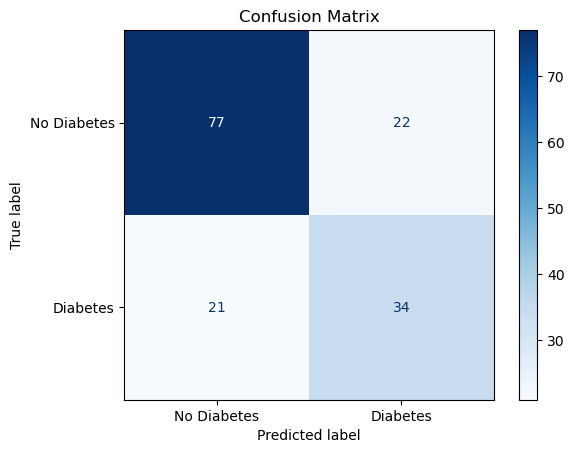

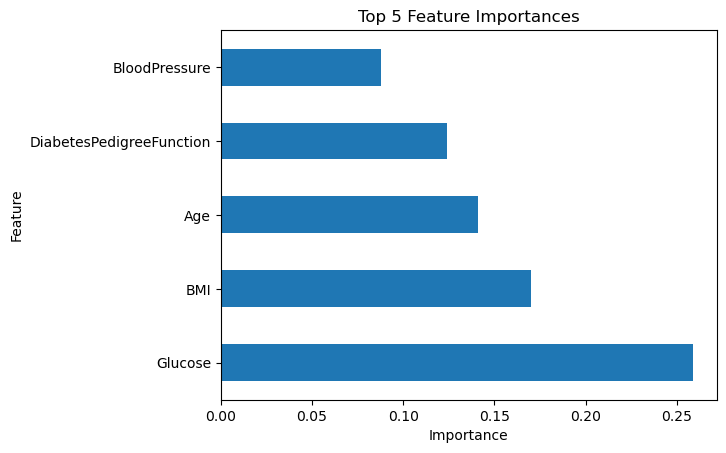

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Load the dataset (replace 'diabetes.csv' with your actual dataset file)
data = pd.read_csv('diabetes.csv')

# Split the data into features (X) and target variable (y)
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Train a Random Forest classifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_normalized, y_train)

# Make predictions on the testing data
y_pred = rf_clf.predict(X_test_normalized)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Plot the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=['No Diabetes', 'Diabetes'])
disp.plot(cmap='Blues', values_format='.0f')
plt.title("Confusion Matrix")
plt.show()

# Plot feature importances
feature_importances = pd.Series(rf_clf.feature_importances_, index=X.columns)
feature_importances.nlargest(5).plot(kind='barh')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Top 5 Feature Importances")
plt.show()
